In [2]:

import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import netCDF4
from scipy import stats
import statsmodels.api as sm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import sys
from mpl_toolkits.axes_grid1 import make_axes_locatable
sys.path.append('/Users/gbromley/Dropbox/code/python_utilities/')
from python_data_functions import extract_months
from python_met_functions import sat_vap_pres
from python_data_functions import mk_test
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText


/Users/gbromley/anaconda/envs/paper1_research/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/gbromley/anaconda/envs/paper1_research/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [3]:
data_dir = '/Users/gbromley/Dropbox/Montana_Climate_Project/NGP_Climatology_Paper/Figures/Data/'
temp = xr.open_dataset(data_dir+'cru_temp_MJ_1970.nc')['t2m_trend']
temp_pval = xr.open_dataset(data_dir+'cru_temp_MJ_1970_pvalues.nc')['t2m_trend_pvalues']

vpd = xr.open_dataset(data_dir+'cru_vpd_MJ_1970.nc')['t2m_trend']
vpd_pval = xr.open_dataset(data_dir+'cru_vpd_MJ_1970_pvalues.nc')['t2m_trend_pvalues']

precip = xr.open_dataset(data_dir+'cru_precip_MJ_1970.nc')['t2m_trend']
precip_pval = xr.open_dataset(data_dir+'cru_precip_MJ_1970_pvalues.nc')['t2m_trend_pvalues']

In [4]:
temp_pval = temp_pval.where(temp_pval.values < 0.05)
vpd_pval = vpd_pval.where(vpd_pval.values < 0.05)
precip_pval = precip_pval.where(precip_pval.values < 0.05)

/Users/gbromley/anaconda/envs/paper1_research/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':
/Users/gbromley/anaconda/envs/paper1_research/lib/python3.6/site-packages/xarray/core/dtypes.py:23: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(dtype, float):
/Users/gbromley/anaconda/envs/paper1_research/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app
/Users/gbromley/anaconda/envs/paper1_research/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()


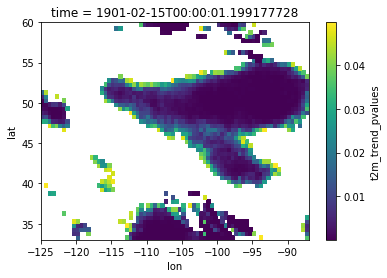

In [26]:
vpd_pval.plot()

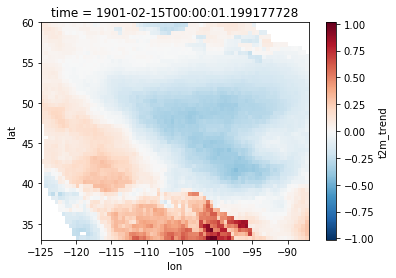

In [23]:
vpd.plot()

In [5]:
t_season='MJ'
t_months=[5,6]
start_year = '1970-01-01'
end_year = '2016-01-01'
ext_e = -92
ext_w = -120
ext_n = 55
ext_s = 38

/Users/gbromley/anaconda/envs/paper1_research/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'color', 'edgecolor', 'add_colorbar'
  s)
/Users/gbromley/anaconda/envs/paper1_research/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'axes', 'color', 'edgecolor'
  s)


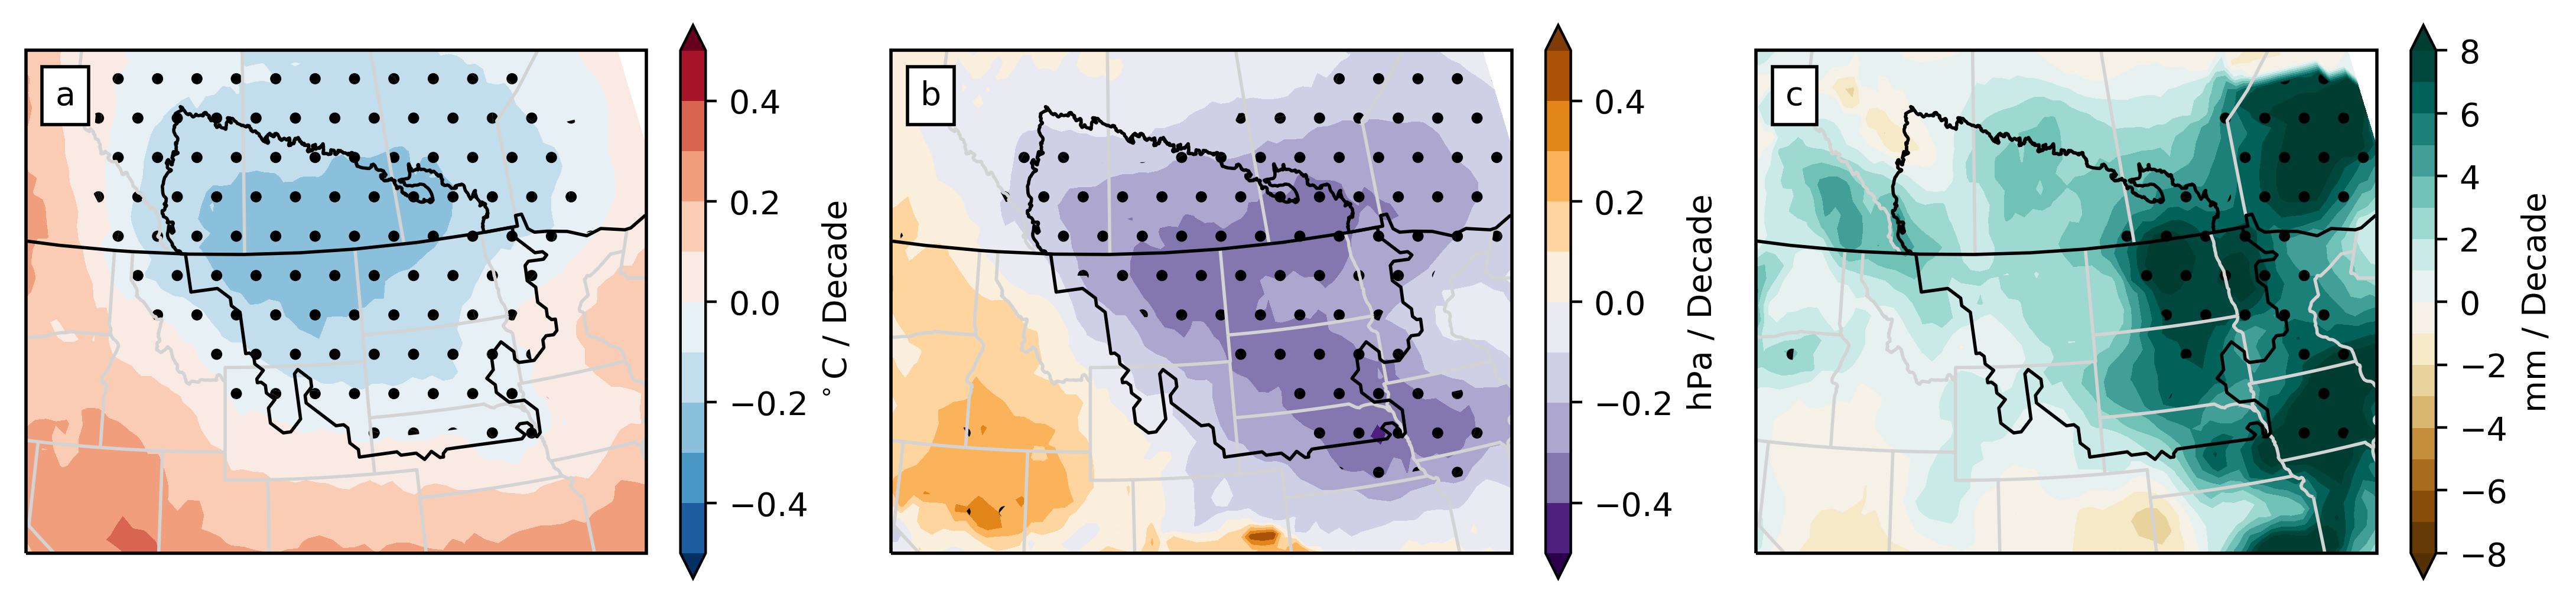

In [12]:
levs = [-.6,-.4,-.3,-.2,-.1,0,.1,.2,.3,.4,.6]
precip_levs = [-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8]
fig = plt.figure(1,figsize=(11,9), dpi=400.0)
projection = ccrs.AlbersEqualArea(central_longitude=-111.0,central_latitude=46.0,false_easting=0.0, false_northing=0.0, standard_parallels=(40.0, 50.0), globe=None)
ax1 = plt.subplot(131, projection = projection)
#ax1 = plt.axes(projection=ccrs.AlbersEqualArea(central_longitude=-111.0,central_latitude=46.0,false_easting=0.0, false_northing=0.0, standard_parallels=(40.0, 50.0), globe=None))
#ax1.set_global()
#test = spatial_trend.plot.pcolormesh(axes = ax1, transform=ccrs.PlateCarree(),vmin=-0.8, vmax=0.8, cmap='RdBu_r',add_colorbar = False)
test = plt.contourf(temp.lon,temp.lat,temp[:,:].values,transform=ccrs.PlateCarree(),levels=levs,cmap='RdBu_r', extend='both')
plt.contourf(temp_pval.lon,temp_pval.lat,temp_pval[:,:].values,transform=ccrs.PlateCarree(),color='none',edgecolor='black',hatches="..",alpha=0.,add_colorbar = False)

#ax = plt.axes(projection=ccrs.LambertConformal())
#temp_pval.plot.contourf(axes=ax1,transform=ccrs.PlateCarree(),color='none',edgecolor='black',hatches="..",alpha=0.,add_colorbar = False)
ax1.set_extent([ext_e, ext_w, ext_s, ext_n])
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
ax1.add_feature(states_provinces, edgecolor='lightgray')
ax1.add_feature(cfeature.COASTLINE)
ax1.add_feature(cfeature.BORDERS)
shape_feature = ShapelyFeature(Reader('/Users/gbromley/Dropbox/Montana_Climate_Project/Study_Area/NGP_Study_Area/Study_Area_08_01_17.shp').geometries(),crs=ccrs.PlateCarree(), facecolor='none',edgecolor='black')
ax1.add_feature(shape_feature)

ax1.title.set_visible(False)
cb = plt.colorbar(test, cmap='RdBu_r',fraction=0.037)
cb.set_label('$^\circ$C / Decade',fontsize=10)
anchored_text = AnchoredText("a", loc=2)
ax1.add_artist(anchored_text)

### VPD Plot ###
ax2 = plt.subplot(132, projection = projection)
#ax1 = plt.axes(projection=ccrs.AlbersEqualArea(central_longitude=-111.0,central_latitude=46.0,false_easting=0.0, false_northing=0.0, standard_parallels=(40.0, 50.0), globe=None))
#ax2.set_global()
#test = spatial_trend.plot.pcolormesh(axes = ax1, transform=ccrs.PlateCarree(),vmin=-0.8, vmax=0.8, cmap='RdBu_r',add_colorbar = False)
test2 = plt.contourf(vpd.lon,vpd.lat,vpd[:,:].values,transform=ccrs.PlateCarree(),levels=levs,cmap='PuOr_r', extend='both')

#ax = plt.axes(projection=ccrs.LambertConformal())
ax2.set_extent([ext_e, ext_w, ext_s, ext_n])
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
ax2.add_feature(states_provinces, edgecolor='lightgray')
ax2.add_feature(cfeature.COASTLINE)
ax2.add_feature(cfeature.BORDERS)
vpd_pval.plot.contourf(axes=ax2,transform=ccrs.PlateCarree(),color='none',edgecolor='black',hatches="..",alpha=0.,add_colorbar = False)


shape_feature = ShapelyFeature(Reader('/Users/gbromley/Dropbox/Montana_Climate_Project/Study_Area/NGP_Study_Area/Study_Area_08_01_17.shp').geometries(),crs=ccrs.PlateCarree(), facecolor='none',edgecolor='black')
ax2.add_feature(shape_feature)

ax2.title.set_visible(False)
cb = plt.colorbar(test2, cmap='PuOr_r',fraction=0.037)
cb.set_label('hPa / Decade',fontsize=10)
anchored_text = AnchoredText("b", loc=2)
ax2.add_artist(anchored_text)

### Precip Plot ###

ax3 = plt.subplot(133, projection = projection)
#ax1 = plt.axes(projection=ccrs.AlbersEqualArea(central_longitude=-111.0,central_latitude=46.0,false_easting=0.0, false_northing=0.0, standard_parallels=(40.0, 50.0), globe=None))
#ax3.set_global()
#test = spatial_trend.plot.pcolormesh(axes = ax1, transform=ccrs.PlateCarree(),vmin=-0.8, vmax=0.8, cmap='RdBu_r',add_colorbar = False)
test3 = plt.contourf(precip.lon,precip.lat,precip[:,:].values,transform=ccrs.PlateCarree(),levels=precip_levs,cmap='BrBG', extend='both')

#ax = plt.axes(projection=ccrs.LambertConformal())
precip_pval.plot.contourf(axes=ax3,transform=ccrs.PlateCarree(),color='none',edgecolor='black',hatches="..",alpha=0.,add_colorbar = False)
ax3.set_extent([ext_e, ext_w, ext_s, ext_n])
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
ax3.add_feature(states_provinces, edgecolor='lightgray')
ax3.add_feature(cfeature.COASTLINE)
ax3.add_feature(cfeature.BORDERS)
shape_feature = ShapelyFeature(Reader('/Users/gbromley/Dropbox/Montana_Climate_Project/Study_Area/NGP_Study_Area/Study_Area_08_01_17.shp').geometries(),crs=ccrs.PlateCarree(), facecolor='none',edgecolor='black')
ax3.add_feature(shape_feature)

ax3.title.set_visible(False)
cb = plt.colorbar(test3, cmap='BrBG',fraction=0.037)
cb.set_label('mm / Decade',fontsize=10)
anchored_text = AnchoredText("c", loc=2)
ax3.add_artist(anchored_text)

plt.tight_layout()
#plt.subplots_adjust(wspace=0.2)
plt.savefig('/Users/gbromley/Dropbox/Montana_Climate_Project/NGP_Climatology_Paper/Figures/cru_3panel_sig_'+t_season+'_1970.png',bbox_inches='tight')
plt.show()
